# 5章　モデルの評価と改良

5.1　交差検証
はじパタp16　交差確認法

In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import mglearn 

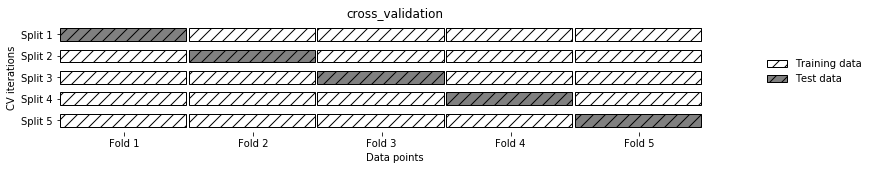

In [4]:
mglearn.plots.plot_cross_validation()

Split:分割結果
Fold:分割
上図は、データを5分割　濃い斜線部をテストデータ　薄い斜線部を訓練データに使用
Split毎に精度（Score）を計算

In [5]:
from sklearn.model_selection import cross_val_score #交差検証
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


データセット　iris
交差検証　cross_val_score
http://scikit-learn.org/stable/modules/cross_validation.html

#print("".format(A)) 変数の文字列への埋め込み　　http://programming-study.com/technology/python-format/

In [6]:
iris = load_iris() 
logreg = LogisticRegression()

In [7]:
IRISDATA = pd.DataFrame(iris.data , columns=["sepal length(cm)","sepal witdh(cm)","petal length(cm)","petal width"])
# sepal ガク　petal　花弁
IRISDATA.head(n=5)

,sepal length(cm),sepal witdh(cm),petal length(cm),petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
scores3 = cross_val_score(LogisticRegression(), iris.data, iris.target)
#cross_val_score デフォルト3分割
print("Cross-validation scores(cv=3): {}".format(scores3))
print("Average cross-validation score: {:.2f}\n\n".format(scores3.mean()))
#交差検証の精度をまとめるには一般的に平均値


scores5 = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores(cv=5): {}".format(scores5))
print("Average cross-validation score5: {:.2f}\n\n".format(scores5.mean()))


scores10 = cross_val_score(logreg, iris.data, iris.target, cv=10)
print("Cross-validation scores(cv=10): {}".format(scores10))
print("Average cross-validation score(cv=10): {:.2f}\n\n".format(scores10.mean()))


scores50 = cross_val_score(logreg, iris.data, iris.target, cv=50)
print("Cross-validation scores(cv=50): {}".format(scores50))
print("Average cross-validation score(cv=50): {:.2f}".format(scores50.mean()))

Cross-validation scores(cv=3): [ 0.96078431  0.92156863  0.95833333]
Average cross-validation score: 0.95


Cross-validation scores(cv=5): [ 1.          0.96666667  0.93333333  0.9         1.        ]
Average cross-validation score5: 0.96


Cross-validation scores(cv=10): [ 1.          1.          1.          0.93333333  0.93333333  0.93333333
  0.8         0.93333333  1.          1.        ]
Average cross-validation score(cv=10): 0.95


Cross-validation scores(cv=50): [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          0.66666667  1.          1.          1.
  0.66666667  1.          1.          1.          1.          1.          1.
  1.          1.          0.66666667  1.          1.          1.
  0.66666667  0.66666667  0.66666667  1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.       

kを大きくすればするほどよい（maxはデータ数）、最大の問題点は計算コスト
k分割でk倍遅くなる

In [9]:
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


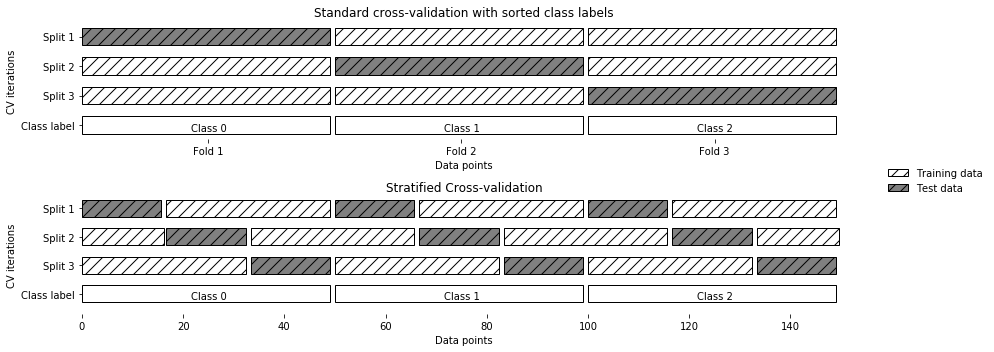

In [10]:
mglearn.plots.plot_stratified_cross_validation()

回帰では通常、sklearnを用いると普通の交差検証を用いる
クラス分類では、層化k分割交差検証を用いる　各分割内でのクラスの比率が全体の比率と同じようになるように分割する

5.1.3.1　交差検証のより詳細な制御　
cvパラメータに交差検証分割器を与える

In [14]:
from sklearn.model_selection import KFold

例　クラス分類に交差検証を用いた場合

In [15]:
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [16]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 0.  0.  0.]


例　データがラベル順ではなく、ランダムにすれば…

In [23]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:{}\n".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:[ 0.9   0.96  0.96]



5.1.3.2１つ抜き交差検証　はじパタp15

In [25]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
#cv=loo 分割数＝データ数
print("Number of cv iterations: {} ".format(len(scores)))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:150 
Mean accuracy: 0.95


大規模データだと大変

5.1.3.3　シャッフル交差検証

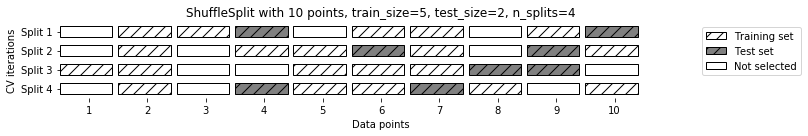

In [26]:
mglearn.plots.plot_shuffle_split()

ShuffleSplit with データの分割数
train_size　トレインデータに用いる数
test_size　テストデータに用いる数
n_splits　繰り返し回数

In [29]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[ 0.84        0.90666667  0.90666667  0.97333333  0.85333333  0.84        0.96
  0.90666667  0.92        0.93333333]


データの一部利用でも可能

In [30]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=0.7, train_size=0.1, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[ 0.78095238  0.95238095  0.84761905  0.59047619  0.80952381  0.7047619
  0.6952381   0.91428571  0.62857143  0.66666667]


層化k分割交差検証ver

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
shuffle_split = StratifiedShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[ 0.89333333  0.94666667  0.96        0.93333333  0.96        0.90666667
  0.93333333  0.94666667  0.94666667  0.94666667]


5.1.3.4 グループ付交差検証

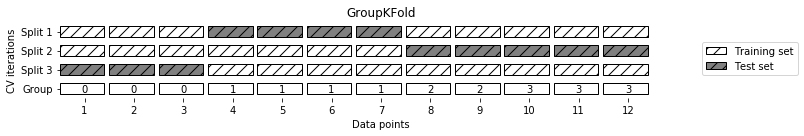

In [35]:
mglearn.plots.plot_group_kfold()

In [36]:
from sklearn.model_selection import GroupKFold
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group,
# then the next four, etc
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[ 0.75        0.8         0.66666667]
